### Exploring Non Linear Regression 

    ### Scikit - IBM Coursera training
    ### Code Along exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

    ### y = 2x + 3

In [4]:
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size) #create some random noise
ydata = y + y_noise

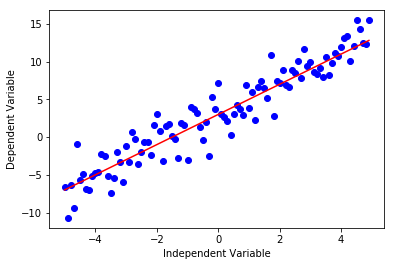

In [7]:
#plot figure
plt.plot(x, ydata, 'bo')
plt.plot(x,y,'r')

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regressions are a relationship: 

Independent variables $x$
Dependent variable $y$ 

Is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

    ## Let's explore a cubic function graph
$$ \ y = a x^3 + b x^2 + c x + d \ $$

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size) #add some extra noise to the data

ydata = y + y_noise

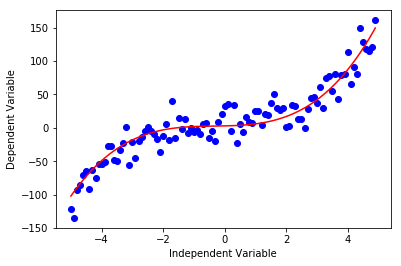

In [11]:
#plot the data - non linear
plt.plot(x, ydata, 'bo')
plt.plot(x,y,'r')

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

    ## Quadratic Function
$$ Y = X^2 $$

In [16]:
x = np.arange(-5.0, 5.0, 0.1)


y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

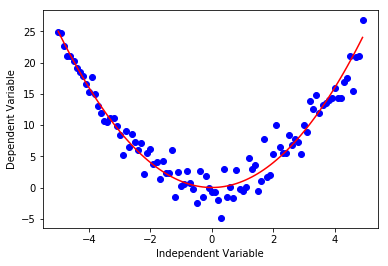

In [19]:
# plot the data 
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Exponential

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 

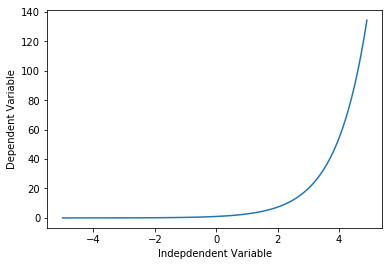

In [20]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


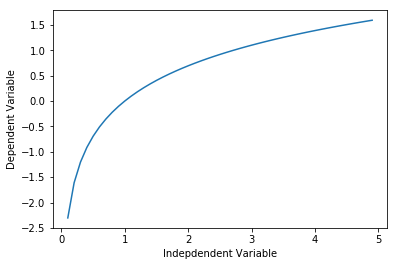

In [21]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoid Function

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

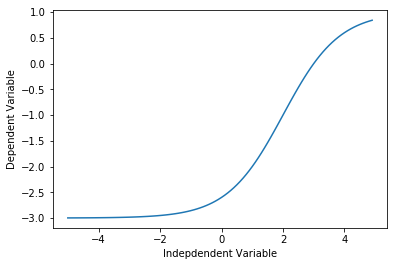

In [22]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Logistic Function

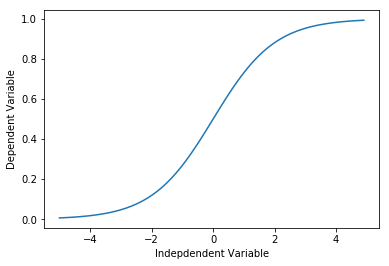

In [33]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Implemeting a Non Linear Regression Model

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('C:\\Users\\Rakib\\Downloads\\Completed Projects -- Machine Learning IBM\\Coursera Data Sets\\china_gdp.csv')

In [25]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [26]:
df.columns

Index(['Year', 'Value'], dtype='object')

In [27]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


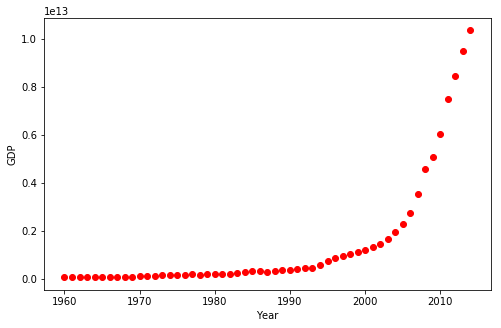

In [32]:
# Let's plot the data to see any pattern 
plt.figure(figsize=(8,5))
x_data = df['Year'].values
y_data = df['Value'].values

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [35]:
# Looks like Logistic Function
# define sigmoid 
def sigmoid(x, beta_1, beta_2):
    y = 1/(1 + np.exp(-beta_1*(x-beta_2)))
    return y

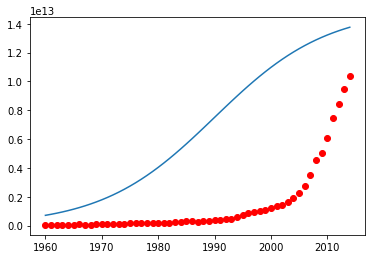

In [43]:
# Let's try a sample sigmoid line that might fit the data
beta_1 = 0.10 #taking some portion of the data
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# Plot the data
plt.plot(x_data, Y_pred*15000000000000.) #try different numbers to find something closer to actual data
plt.plot(x_data, y_data, 'ro')

    ## Let's try to find a better parameters to fit the data 

In [44]:
# Normalize x and y
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [45]:
# Using curve_fit function
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


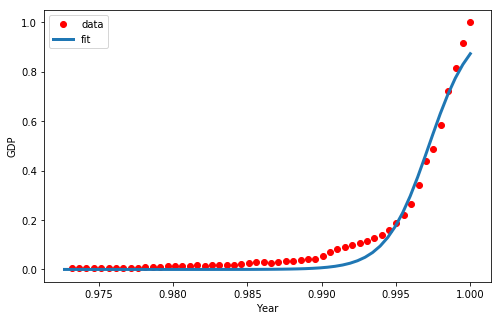

In [47]:
## Let's plot the regression model with best fitted parameters
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

plt.figure(figsize=(8,5))
plt.plot(xdata,ydata,'ro',label='data')

plt.plot(x,y,linewidth=3.0, label='fit')
plt.legend(loc='best')

plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()